In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    figsize = (10, 7)
    
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                       c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'), 
                                       alpha=0.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')    
    plt.show()

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [4]:
X.shape

(1797, 64)

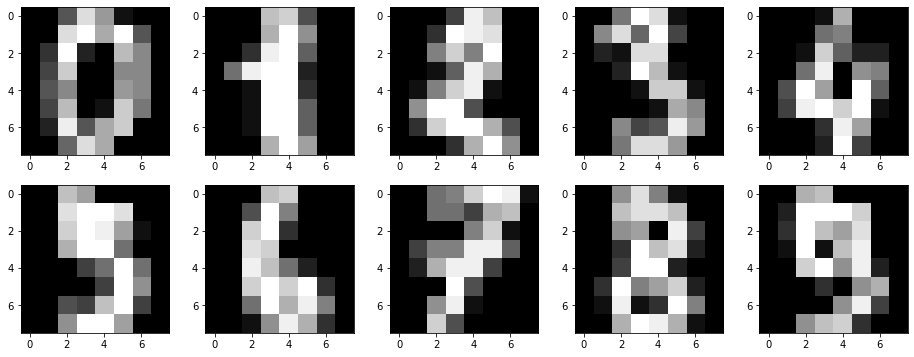

In [5]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i, :].reshape([8, 8]), cmap='gray')

In [6]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Понижение размерности

#### PCA

In [7]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(1797, 2)

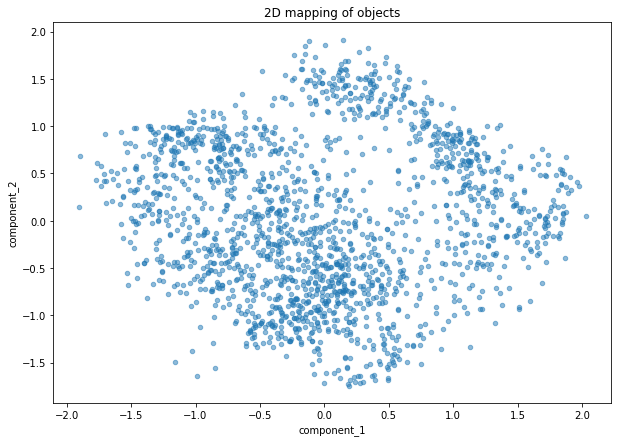

In [8]:
dims = 2
colnames = ['component_' + str(i) for i in range(1, dims + 1)]
components_X_reduced = pd.DataFrame(data=X_reduced, columns=colnames)
components_X_reduced.head()

display_components_in_2D_space(components_X_reduced)

#### TSNE

In [9]:
tsne = TSNE(random_state=14, perplexity=41)

X_tsne = tsne.fit_transform(X)

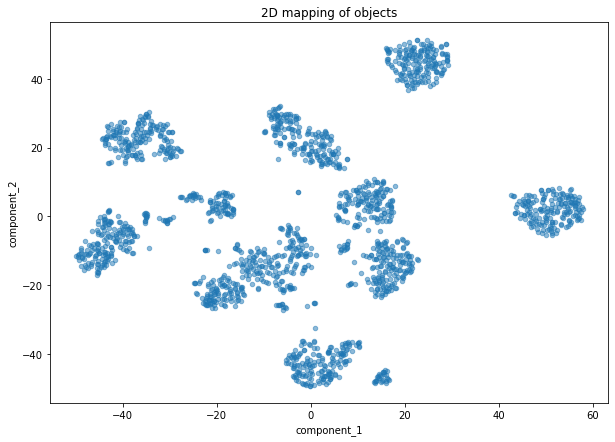

In [10]:
dims = 2
colnames = ['component_' + str(i) for i in range(1, dims + 1)]
components_X_tsne = pd.DataFrame(data=X_tsne, columns=colnames)
components_X_tsne.head()

display_components_in_2D_space(components_X_tsne)

### Кластеризация

#### KMeans

In [11]:
kmeans = KMeans(n_clusters=10, random_state=41)
labels_clast = kmeans.fit_predict(X)
labels_clast = pd.Series(labels_clast, name='clusters')

In [12]:
labels_clast.shape

(1797,)

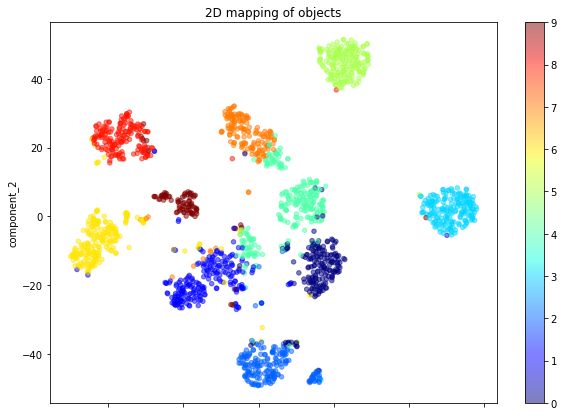

In [13]:
display_components_in_2D_space(components_X_tsne, labels=labels_clast)

#### AgglomerativeClustering

In [14]:
aggl = AgglomerativeClustering(n_clusters=10)
labels_clast = aggl.fit_predict(X)
labels_clast = pd.Series(labels_clast)

In [15]:
labels_clast.shape

(1797,)

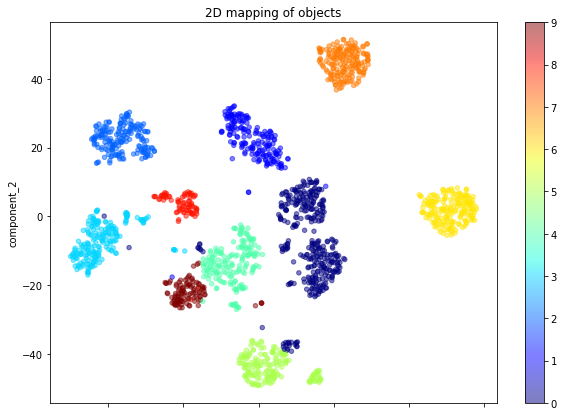

In [16]:
display_components_in_2D_space(components_X_tsne, labels=labels_clast)

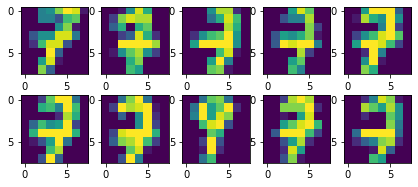

In [17]:
plt.figure(figsize=(7, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[labels_clast == 3][i,:].reshape([8, 8]))

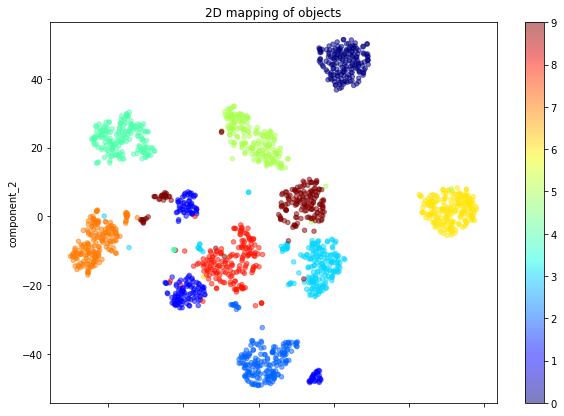

In [18]:
display_components_in_2D_space(components_X_tsne, labels=y)